### 4.1 Import Modules & Declare Reused Functions

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
from sklearn.feature_extraction.text import CountVectorizer
from scipy.stats import pearsonr


In [6]:
# Function to plot top 20 words for each metric in a subplot
def top20SubBox(ax, correlations, metric, data_type):
    # Sort words by correlation with the specified metric
    sorted_words = sorted(correlations.items(), key=lambda x: x[1][metric], reverse=True)
    
    # Extract top 20 words and their correlations
    top_20_words = [word[0] for word in sorted_words[:20]]
    top_20_correlations = [word[1][metric] for word in sorted_words[:20]]
    
    # Plot horizontal bar chart
    ax.barh(top_20_words, top_20_correlations, color='teal')
    ax.set_xlabel(f'Correlation with {metric}')
    ax.set_title(f'Top 20 {data_type} Correlated with {metric}')
    ax.invert_yaxis()

### 4.2 Import Dataset (non-bootstraped and bootstrapped)

In [3]:
# Import data and drop unnecessary columns
captionDF = pd.read_csv("Datasets/cleaned-IG-data.csv", encoding="utf-8", sep=",")
captionDF = captionDF.drop('Unnamed: 0', axis=1)

In [4]:
captionDF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119 entries, 0 to 118
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Impressions         119 non-null    int64 
 1   Comments            119 non-null    int64 
 2   Shares              119 non-null    int64 
 3   Likes               119 non-null    int64 
 4   Caption             119 non-null    object
 5   Hashtags            119 non-null    object
 6   fullCaption         119 non-null    object
 7   Tokenized_Text      119 non-null    object
 8   Stemmed_Text        119 non-null    object
 9   tokenizedCaptions   119 non-null    object
 10  Tokenized_Hashtags  119 non-null    object
 11  Stemmed_Hashtags    119 non-null    object
 12  tokenizedHashtags   119 non-null    object
dtypes: int64(4), object(9)
memory usage: 12.2+ KB


In [11]:
bootstrappedDF = pd.read_csv("Datasets/BootstrappedAndNoOutlier.csv", encoding="utf-8", sep=",")
bootstrappedDF = bootstrappedDF.drop('Unnamed: 0', axis=1)

In [12]:
bootstrappedDF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2243 entries, 0 to 2242
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Impressions         2243 non-null   int64 
 1   Comments            2243 non-null   int64 
 2   Shares              2243 non-null   int64 
 3   Likes               2243 non-null   int64 
 4   Caption             2243 non-null   object
 5   Hashtags            2243 non-null   object
 6   fullCaption         2243 non-null   object
 7   Tokenized_Text      2243 non-null   object
 8   Stemmed_Text        2243 non-null   object
 9   tokenizedCaptions   2243 non-null   object
 10  Tokenized_Hashtags  2243 non-null   object
 11  Stemmed_Hashtags    2243 non-null   object
 12  tokenizedHashtags   2243 non-null   object
dtypes: int64(4), object(9)
memory usage: 227.9+ KB


### 4.3 We are using the original dataset (n=119) before bootstrapping to find the correlation between caption and `likes`, `comments`, `shares`, `impression`.

#### 4.3.1 Finding Correlation of Captions and Likes/comments/shares/impressions `(non-bootstrapped data)`.

In [5]:
# Tokenizing captions and calculating correlation with metrics
vectorizer = CountVectorizer()
document_term_matrix = vectorizer.fit_transform(captionDF['tokenizedCaptions'])
word_freq_df = pd.DataFrame(document_term_matrix.toarray(), columns=vectorizer.get_feature_names_out())

# Add engagement metrics to word frequency DataFrame
word_freq_df['Impressions'] = captionDF['Impressions']
word_freq_df['Comments'] = captionDF['Comments']
word_freq_df['Shares'] = captionDF['Shares']
word_freq_df['Likes'] = captionDF['Likes']

# Calculate correlations and store in a dictionary
correlations = {}
for word in vectorizer.get_feature_names_out():
    correlations[word] = {
        'Impressions': pearsonr(word_freq_df[word], word_freq_df['Impressions'])[0],
        'Comments': pearsonr(word_freq_df[word], word_freq_df['Comments'])[0],
        'Shares': pearsonr(word_freq_df[word], word_freq_df['Shares'])[0],
        'Likes': pearsonr(word_freq_df[word], word_freq_df['Likes'])[0]
    }


# Print the correlations
for word, corr in correlations.items():
    print(f"Word: {word}")
    print(f"  Impressions Correlation: {corr['Impressions']}")
    print(f"  Comments Correlation: {corr['Comments']}")
    print(f"  Shares Correlation: {corr['Shares']}")
    print(f"  Likes Correlation: {corr['Likes']}\n")


Word: account
  Impressions Correlation: 0.02914395457891885
  Comments Correlation: 0.0348479542919285
  Shares Correlation: -0.05828857739745497
  Likes Correlation: -0.0031214492013159575

Word: accuraci
  Impressions Correlation: -0.05273350259050045
  Comments Correlation: -0.12163908573597682
  Shares Correlation: -0.07661444453166143
  Likes Correlation: -0.0839207747507876

Word: activ
  Impressions Correlation: -0.03303710729939539
  Comments Correlation: -0.09555791239799265
  Shares Correlation: -0.04912564383035174
  Likes Correlation: -0.0928984775896178

Word: ai
  Impressions Correlation: -0.028899391613430137
  Comments Correlation: -0.08650093209906444
  Shares Correlation: -0.023430323114667584
  Likes Correlation: -0.019589884516968997

Word: alexnet
  Impressions Correlation: -0.06653243068688511
  Comments Correlation: -0.017314392384039933
  Shares Correlation: -0.058288577397454966
  Likes Correlation: -0.10412060613815552

Word: algorithm
  Impressions Correlati

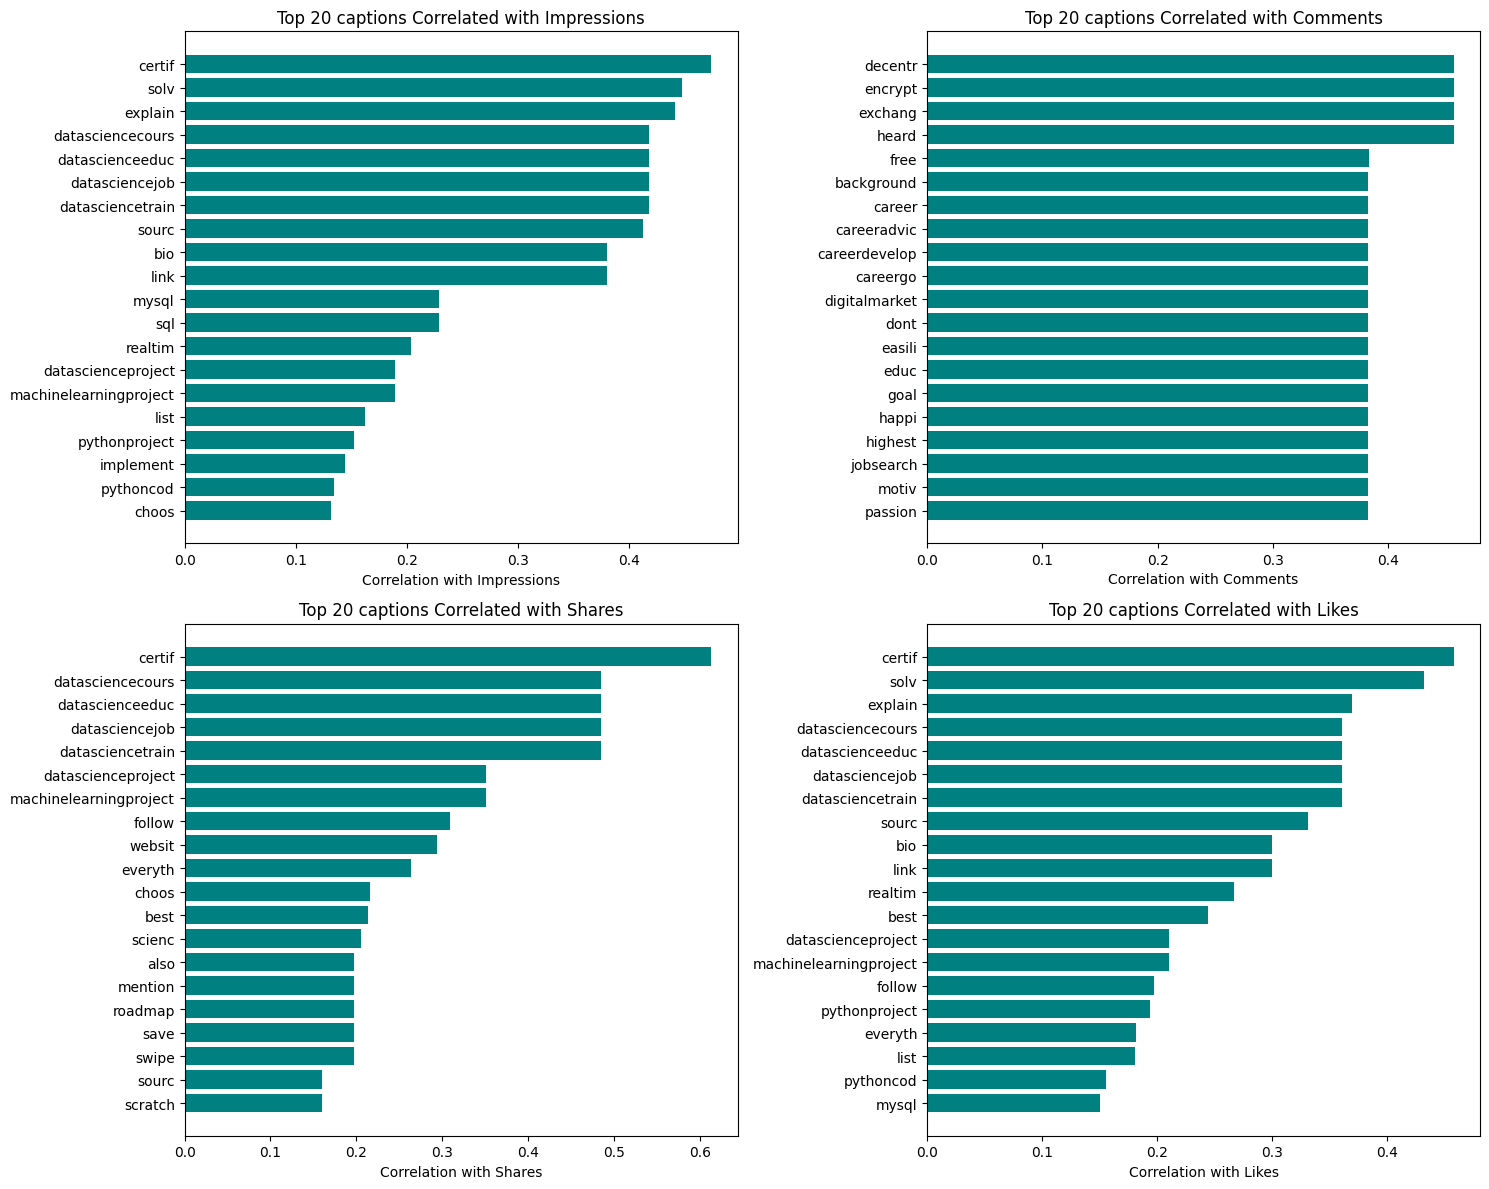

In [7]:

# Create a figure with 4 subplots (2 rows, 2 columns)
fig, axs = plt.subplots(2, 2, figsize=(15, 12))

# Plot the top 20 words for each metric in each subplot
top20SubBox(axs[0, 0], correlations, 'Impressions', 'captions')
top20SubBox(axs[0, 1], correlations, 'Comments', 'captions')
top20SubBox(axs[1, 0], correlations, 'Shares', 'captions')
top20SubBox(axs[1, 1], correlations, 'Likes', 'captions')

# Adjust layout to prevent overlap and display the figure
plt.tight_layout()
plt.show()


#### 4.3.2 Finding Correlation of Hashtags and likes/comments/shares/impressions `(non-bootstrapped data)`.

In [8]:
# Create an instance of CountVectorizer
vectorizer = CountVectorizer()
# Convert the tokenized captions directly into a document-term matrix
document_term_matrix = vectorizer.fit_transform(captionDF['tokenizedHashtags'])

# Convert the matrix to a DataFrame
word_freq_df = pd.DataFrame(document_term_matrix.toarray(), columns=vectorizer.get_feature_names_out())

# Add the columns Impressions, Comments, Shares, and Likes to the word_freq_df DataFrame
word_freq_df['Impressions'] = captionDF['Impressions']
word_freq_df['Comments'] = captionDF['Comments']
word_freq_df['Shares'] = captionDF['Shares']
word_freq_df['Likes'] = captionDF['Likes']

# Calculate the correlation between each word and Impressions, Comments, Shares, Likes
correlations = {}

for word in vectorizer.get_feature_names_out():
    correlations[word] = {
        'Impressions': pearsonr(word_freq_df[word], word_freq_df['Impressions'])[0],
        'Comments': pearsonr(word_freq_df[word], word_freq_df['Comments'])[0],
        'Shares': pearsonr(word_freq_df[word], word_freq_df['Shares'])[0],
        'Likes': pearsonr(word_freq_df[word], word_freq_df['Likes'])[0]
    }

# Print the correlations
for word, corr in correlations.items():
    print(f"Word: {word}")
    print(f"  Impressions Correlation: {corr['Impressions']}")
    print(f"  Comments Correlation: {corr['Comments']}")
    print(f"  Shares Correlation: {corr['Shares']}")
    print(f"  Likes Correlation: {corr['Likes']}\n")


Word: ai
  Impressions Correlation: -0.028899391613430137
  Comments Correlation: -0.08650093209906444
  Shares Correlation: -0.023430323114667584
  Likes Correlation: -0.019589884516968997

Word: alexnet
  Impressions Correlation: -0.06653243068688511
  Comments Correlation: -0.017314392384039933
  Shares Correlation: -0.058288577397454966
  Likes Correlation: -0.10412060613815552

Word: algorithm
  Impressions Correlation: 0.03922580461089839
  Comments Correlation: -0.03579024828578319
  Shares Correlation: -0.14947861538267151
  Likes Correlation: 0.019746152618648632

Word: amankharw
  Impressions Correlation: 0.06504132174648543
  Comments Correlation: 0.04311148753063347
  Shares Correlation: 0.05675681350971865
  Likes Correlation: 0.1032498416080827

Word: amazonfind
  Impressions Correlation: -0.07288859350688037
  Comments Correlation: 0.16061752755095207
  Shares Correlation: -0.06977041814874853
  Likes Correlation: -0.13034472156309002

Word: analysi
  Impressions Correla

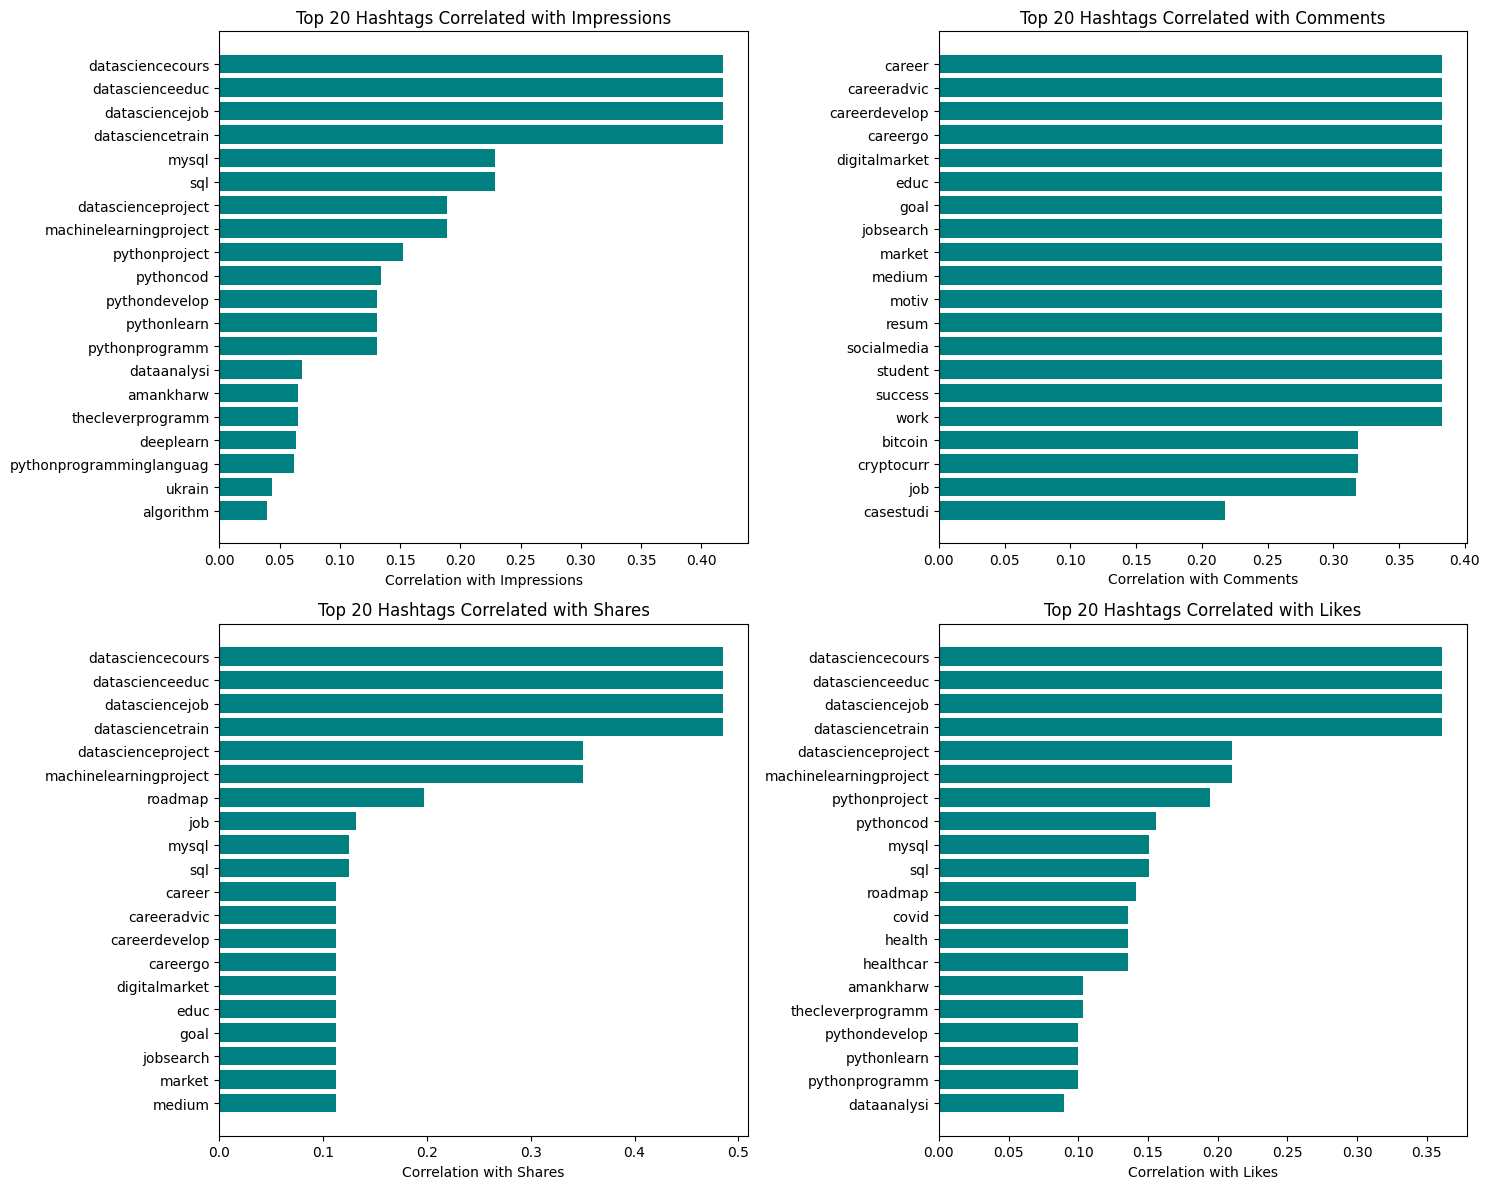

In [9]:
# Create a figure with 4 subplots (2 rows, 2 columns)
fig, axs = plt.subplots(2, 2, figsize=(15, 12))

# Plot the top 20 words for each metric in each subplot
top20SubBox(axs[0, 0], correlations, 'Impressions','Hashtags')
top20SubBox(axs[0, 1], correlations, 'Comments','Hashtags')
top20SubBox(axs[1, 0], correlations, 'Shares','Hashtags')
top20SubBox(axs[1, 1], correlations, 'Likes','Hashtags')

# Adjust layout to prevent overlap and display the figure
plt.tight_layout()
plt.show()


### 4.4 We are using the Bootstrapped dataset (n=2243) to find the correlation between caption and `likes`, `comments`, `shares`, `impression`.

#### 4.4.1 Finding Correlation of Caption words and Likes/comments/shares/impressions `(bootstrapped data)`.

In [15]:
# Tokenizing captions and calculating correlation with metrics
vectorizer = CountVectorizer()
document_term_matrix = vectorizer.fit_transform(bootstrappedDF['tokenizedCaptions'])
word_freq_df = pd.DataFrame(document_term_matrix.toarray(), columns=vectorizer.get_feature_names_out())

# Add engagement metrics to word frequency DataFrame
word_freq_df['Impressions'] = bootstrappedDF['Impressions']
word_freq_df['Comments'] = bootstrappedDF['Comments']
word_freq_df['Shares'] = bootstrappedDF['Shares']
word_freq_df['Likes'] = bootstrappedDF['Likes']

# Calculate correlations and store in a dictionary
correlations = {}
for word in vectorizer.get_feature_names_out():
    correlations[word] = {
        'Impressions': pearsonr(word_freq_df[word], word_freq_df['Impressions'])[0],
        'Comments': pearsonr(word_freq_df[word], word_freq_df['Comments'])[0],
        'Shares': pearsonr(word_freq_df[word], word_freq_df['Shares'])[0],
        'Likes': pearsonr(word_freq_df[word], word_freq_df['Likes'])[0]
    }


# Print the correlations
for word, corr in correlations.items():
    print(f"Word: {word}")
    print(f"  Impressions Correlation: {corr['Impressions']}")
    print(f"  Comments Correlation: {corr['Comments']}")
    print(f"  Shares Correlation: {corr['Shares']}")
    print(f"  Likes Correlation: {corr['Likes']}\n")


Word: account
  Impressions Correlation: 0.16057586938345755
  Comments Correlation: 0.06635598083203273
  Shares Correlation: -0.07402865477067552
  Likes Correlation: 0.03916645539240789

Word: accuraci
  Impressions Correlation: -0.12228757026543952
  Comments Correlation: -0.20381742734370625
  Shares Correlation: -0.15279312045484425
  Likes Correlation: -0.1360518778226512

Word: activ
  Impressions Correlation: -0.027537284123255002
  Comments Correlation: -0.1099487633118306
  Shares Correlation: -0.05661425805849671
  Likes Correlation: -0.112051996187196

Word: ai
  Impressions Correlation: 0.2198075853658276
  Comments Correlation: 0.037772897237962524
  Shares Correlation: -0.16604808678213742
  Likes Correlation: 0.13145404137126843

Word: alexnet
  Impressions Correlation: -0.18088141990234297
  Comments Correlation: -0.005847311707922711
  Shares Correlation: -0.10390716807195914
  Likes Correlation: -0.18380842898950664

Word: algorithm
  Impressions Correlation: 0.2329

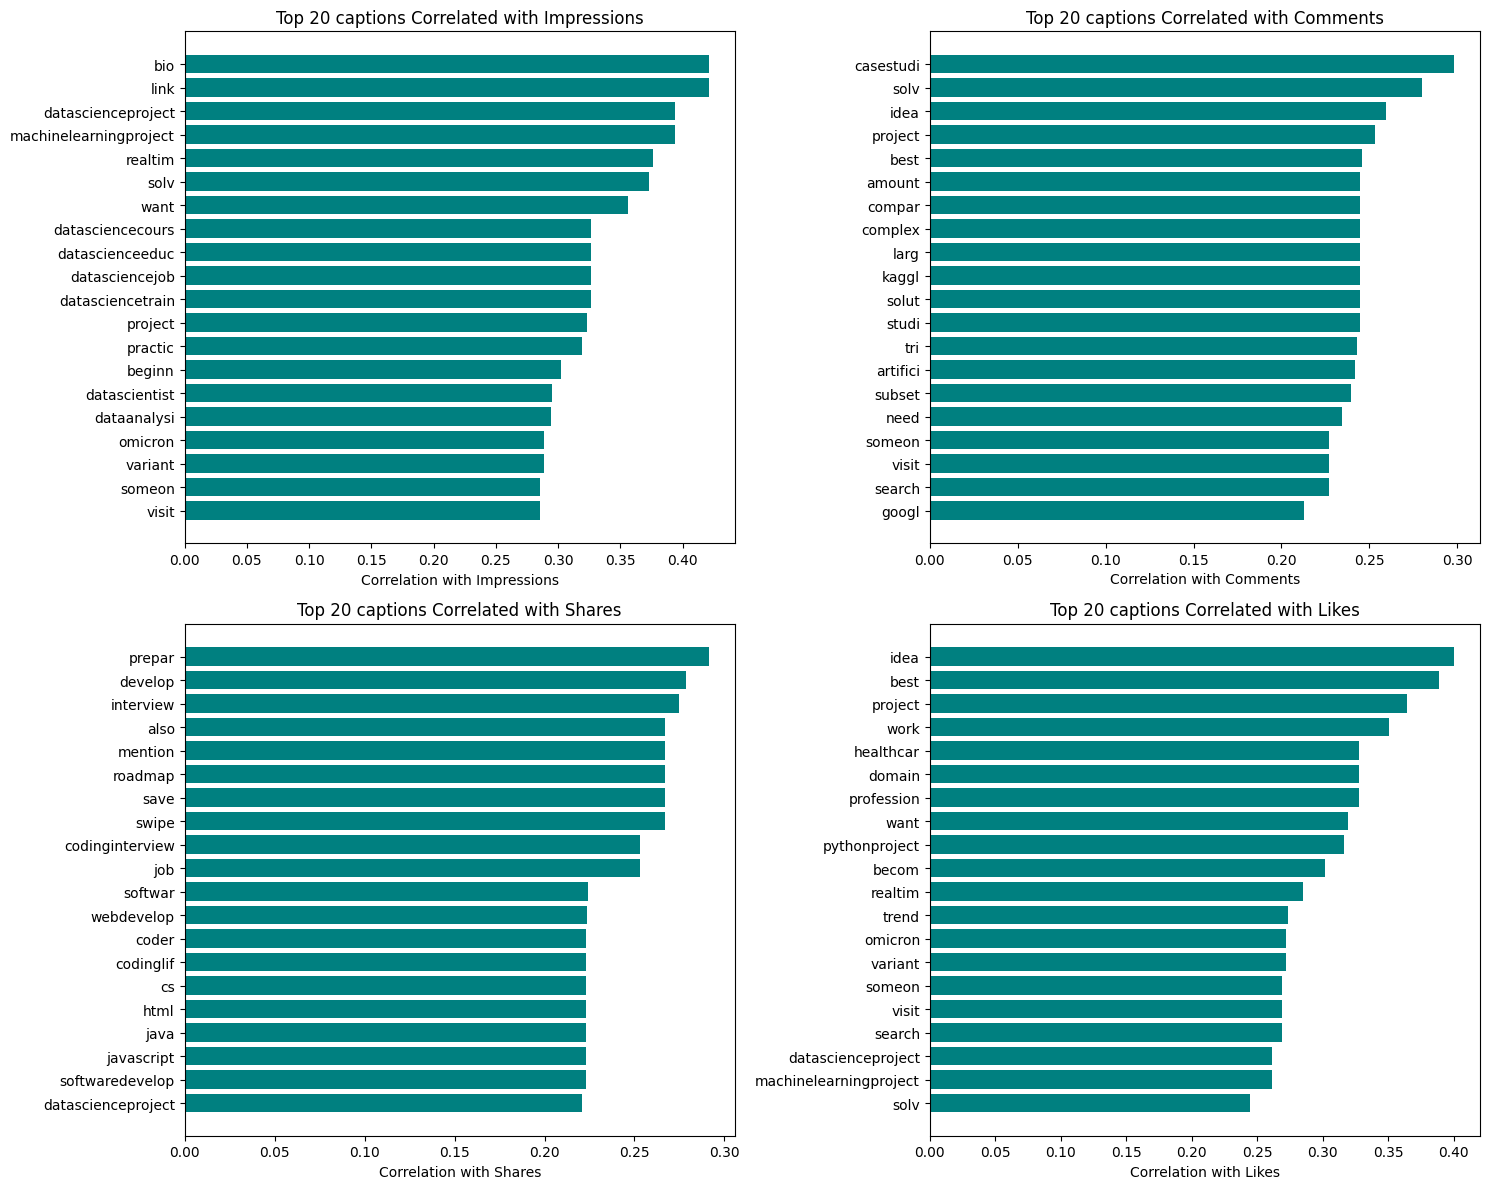

In [16]:

# Create a figure with 4 subplots (2 rows, 2 columns)
fig, axs = plt.subplots(2, 2, figsize=(15, 12))

# Plot the top 20 words for each metric in each subplot
top20SubBox(axs[0, 0], correlations, 'Impressions', 'captions')
top20SubBox(axs[0, 1], correlations, 'Comments', 'captions')
top20SubBox(axs[1, 0], correlations, 'Shares', 'captions')
top20SubBox(axs[1, 1], correlations, 'Likes', 'captions')

# Adjust layout to prevent overlap and display the figure
plt.tight_layout()
plt.show()

#### 4.4.2 Finding Correlation of Hashtag words and Likes/comments/shares/impressions `(bootstrapped data)`.

In [17]:
# Create an instance of CountVectorizer
vectorizer = CountVectorizer()
# Convert the tokenized captions directly into a document-term matrix
document_term_matrix = vectorizer.fit_transform(bootstrappedDF['tokenizedHashtags'])

# Convert the matrix to a DataFrame
word_freq_df = pd.DataFrame(document_term_matrix.toarray(), columns=vectorizer.get_feature_names_out())

# Add the columns Impressions, Comments, Shares, and Likes to the word_freq_df DataFrame
word_freq_df['Impressions'] = bootstrappedDF['Impressions']
word_freq_df['Comments'] = bootstrappedDF['Comments']
word_freq_df['Shares'] = bootstrappedDF['Shares']
word_freq_df['Likes'] = bootstrappedDF['Likes']

# Calculate the correlation between each word and Impressions, Comments, Shares, Likes
correlations = {}

for word in vectorizer.get_feature_names_out():
    correlations[word] = {
        'Impressions': pearsonr(word_freq_df[word], word_freq_df['Impressions'])[0],
        'Comments': pearsonr(word_freq_df[word], word_freq_df['Comments'])[0],
        'Shares': pearsonr(word_freq_df[word], word_freq_df['Shares'])[0],
        'Likes': pearsonr(word_freq_df[word], word_freq_df['Likes'])[0]
    }

# Print the correlations
for word, corr in correlations.items():
    print(f"Word: {word}")
    print(f"  Impressions Correlation: {corr['Impressions']}")
    print(f"  Comments Correlation: {corr['Comments']}")
    print(f"  Shares Correlation: {corr['Shares']}")
    print(f"  Likes Correlation: {corr['Likes']}\n")


Word: ai
  Impressions Correlation: 0.2198075853658276
  Comments Correlation: 0.037772897237962524
  Shares Correlation: -0.16604808678213742
  Likes Correlation: 0.13145404137126843

Word: alexnet
  Impressions Correlation: -0.18088141990234297
  Comments Correlation: -0.005847311707922711
  Shares Correlation: -0.10390716807195914
  Likes Correlation: -0.18380842898950664

Word: algorithm
  Impressions Correlation: 0.058670792996
  Comments Correlation: -0.048437939818805044
  Shares Correlation: -0.17844685652730394
  Likes Correlation: -0.03912155198444829

Word: amankharw
  Impressions Correlation: 0.13677956733400046
  Comments Correlation: 0.04766555561068561
  Shares Correlation: 0.10695588781085492
  Likes Correlation: 0.1702233635714622

Word: amazonfind
  Impressions Correlation: -0.08481988945543345
  Comments Correlation: 0.17622936693367766
  Shares Correlation: -0.05795958420593434
  Likes Correlation: -0.1127795425603715

Word: analysi
  Impressions Correlation: -0.079

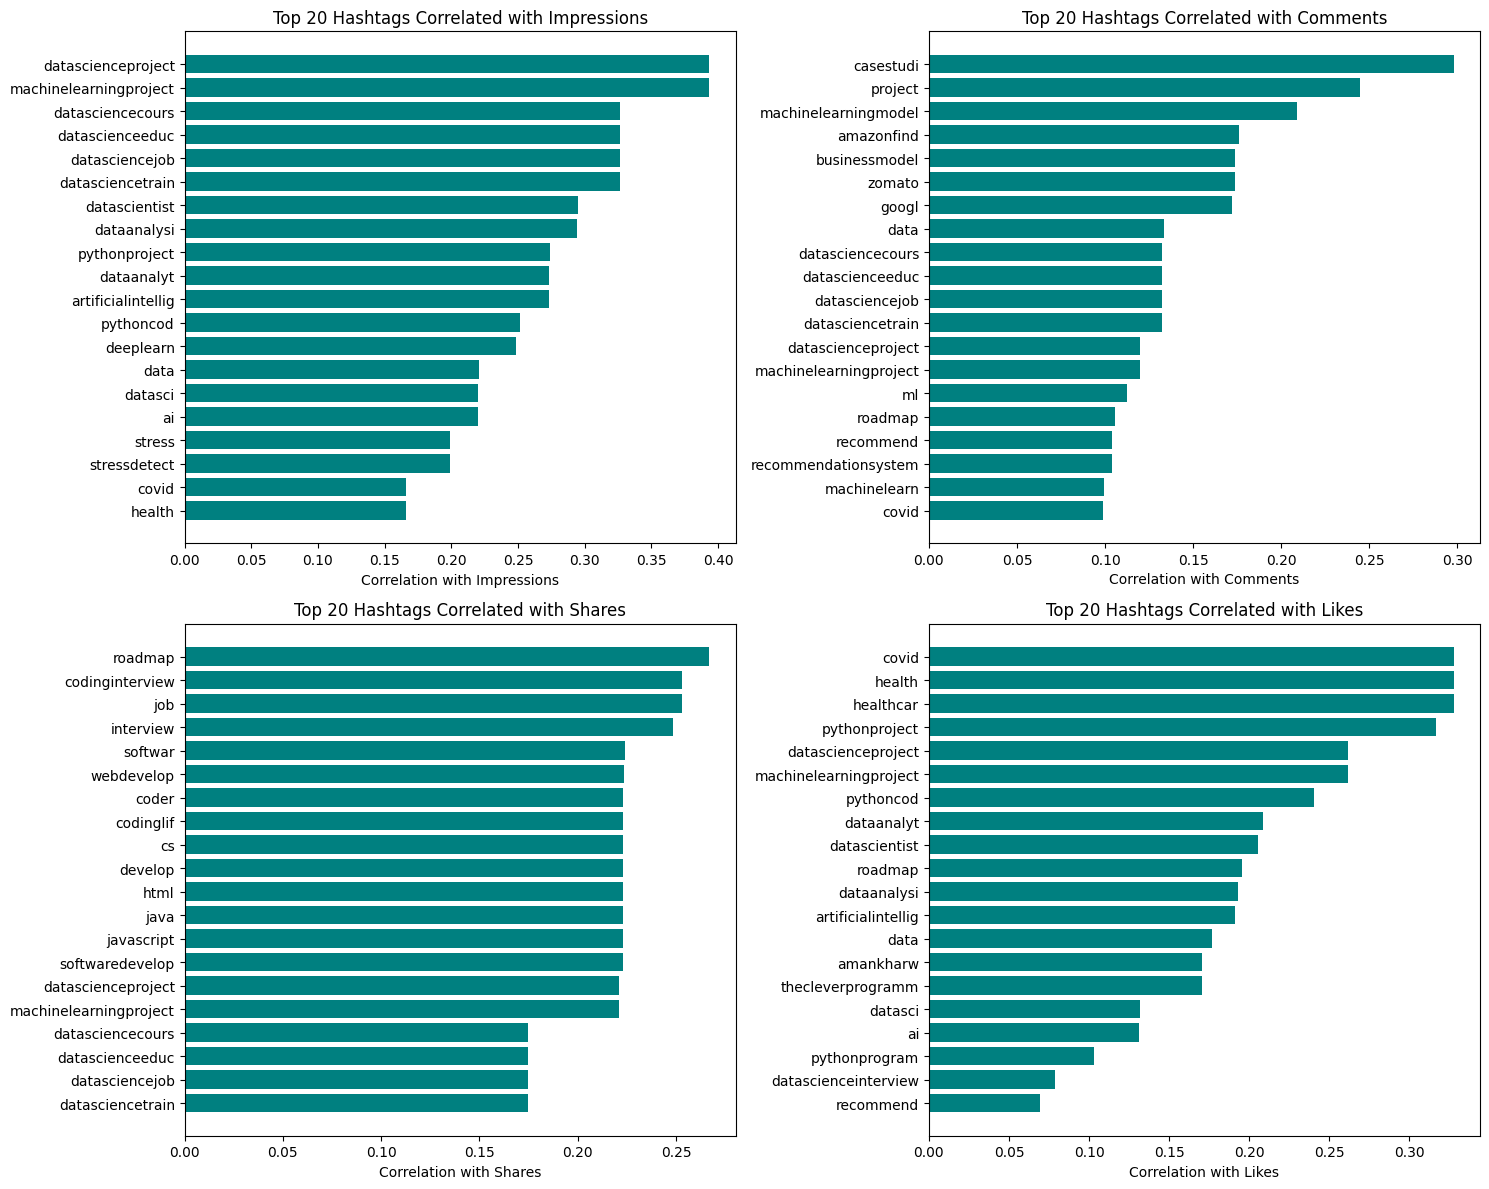

In [18]:
# Create a figure with 4 subplots (2 rows, 2 columns)
fig, axs = plt.subplots(2, 2, figsize=(15, 12))

# Plot the top 20 words for each metric in each subplot
top20SubBox(axs[0, 0], correlations, 'Impressions','Hashtags')
top20SubBox(axs[0, 1], correlations, 'Comments','Hashtags')
top20SubBox(axs[1, 0], correlations, 'Shares','Hashtags')
top20SubBox(axs[1, 1], correlations, 'Likes','Hashtags')

# Adjust layout to prevent overlap and display the figure
plt.tight_layout()
plt.show()


### 4.5 Conclusion: These words and hashtags can be leveraged to enhance engagement with the target audience.

#### 4.5.1 `(Non-Bootstrapped Data)` Based on the analysis, the top Caption and Hashtags that correlate most strongly with `likes`, `comments`, `shares` and `impression` are as follows:

- **Top Captions for Impressions**: `certif`, solv, explain, datasciencecours, datascienceeduc
- **Top Captions for Likes**: `certif`, solv, explain, datasciencecours, datascienceeduc
- **Top Captions for Comments**: `decentr`, encrypt, exchang, heard, free
- **Top Captions for Shares**: `certif`, datasciencecours, datascienceeduc, datasciencejob, datasciencetrain

- **Top Hashtags for Impressions**: `datasciencecours`, datascienceeduc, datasciencejob, datasciencetrain, mysql
- **Top Hashtags for Likes**: `datasciencecours`, datascienceeduc, datasciencejob, datasciencetrain, datascienceproject
- **Top Hashtags for Comments**: `career`, careeradvic, careerdevelop, careergo, digitalmarket
- **Top Hashtags for Shares**: `datasciencecours`, datascienceeduc, datasciencejob, datasciencetrain, datascienceproject

#### 4.5.2 `(Bootstrapped Data)` Based on the analysis, the top Caption and Hashtags that correlate most strongly with `likes`, `comments`, `shares` and `impression` are as follows:

- **Top Captions for Impressions**: `bio`, link, datascienceproject, machinelearningproject, realtim
- **Top Captions for Likes**: `idea`, best, project, work, healthcar
- **Top Captions for Comments**: `casestudi`, solv, idea, project, best
- **Top Captions for Shares**: `prepar`, develop, interview, also, mention 

- **Top Hashtags for Impressions**: `datascienceproject`, machinelearningproject, datasciencecours, datascienceeduc, datasciencejob
- **Top Hashtags for Likes**: `covid`, health, healthcare, pythonproj, datascienceproject
- **Top Hashtags for Comments**: `casestudi`, project, machinelearningmodel, amazonfind, businessmodel
- **Top Hashtags for Shares**: `roadmap`, codinginterview, job, interview, softwar


#### 4.5.3 Addendum
Captions and Hashtags have undergone lemmatization and stemming in `Section 1:Data Extraction`